# TRAFFIC SIGN RECOGNIZATION

The significance of traffic signs lies in their ability to assist drivers in adhering to traffic regulations and minimizing road accidents. Nonetheless, it can be challenging for drivers to pay attention to signs amid other road activities. Furthermore, the increasing development of automated driving and driverless cars underscores the importance of traffic sign recognition.

In this notebook we use the German Traffic Sign Recognition Benchmark Dataset which has lifelike images of traffic signs which a=have been classified into 43 classes. The train and test sets combined consist of more than 50000 images.

In [75]:
# import the libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tensorflow import keras 
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score


In [76]:
# Defining the classes and providing image path.
data = []
labels = []
classes = 43
img_path = "C:/Users/DELL 5401/Downloads/archive/train"

In [77]:
# Executing the data
for i in range(classes):
    path = os.path.join(img_path,str(i))
    images = os.listdir(path)

    for a in images:

        image = Image.open(path + '/'+ a)
        image = image.resize((32,32))
        image = np.array(image)
        data.append(image)
        labels.append(i)

data = np.array(data)
labels = np.array(labels)

C:\Users\DELL 5401\AppData\Local\Temp\ipykernel_9792\739185635.py:14: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=None)


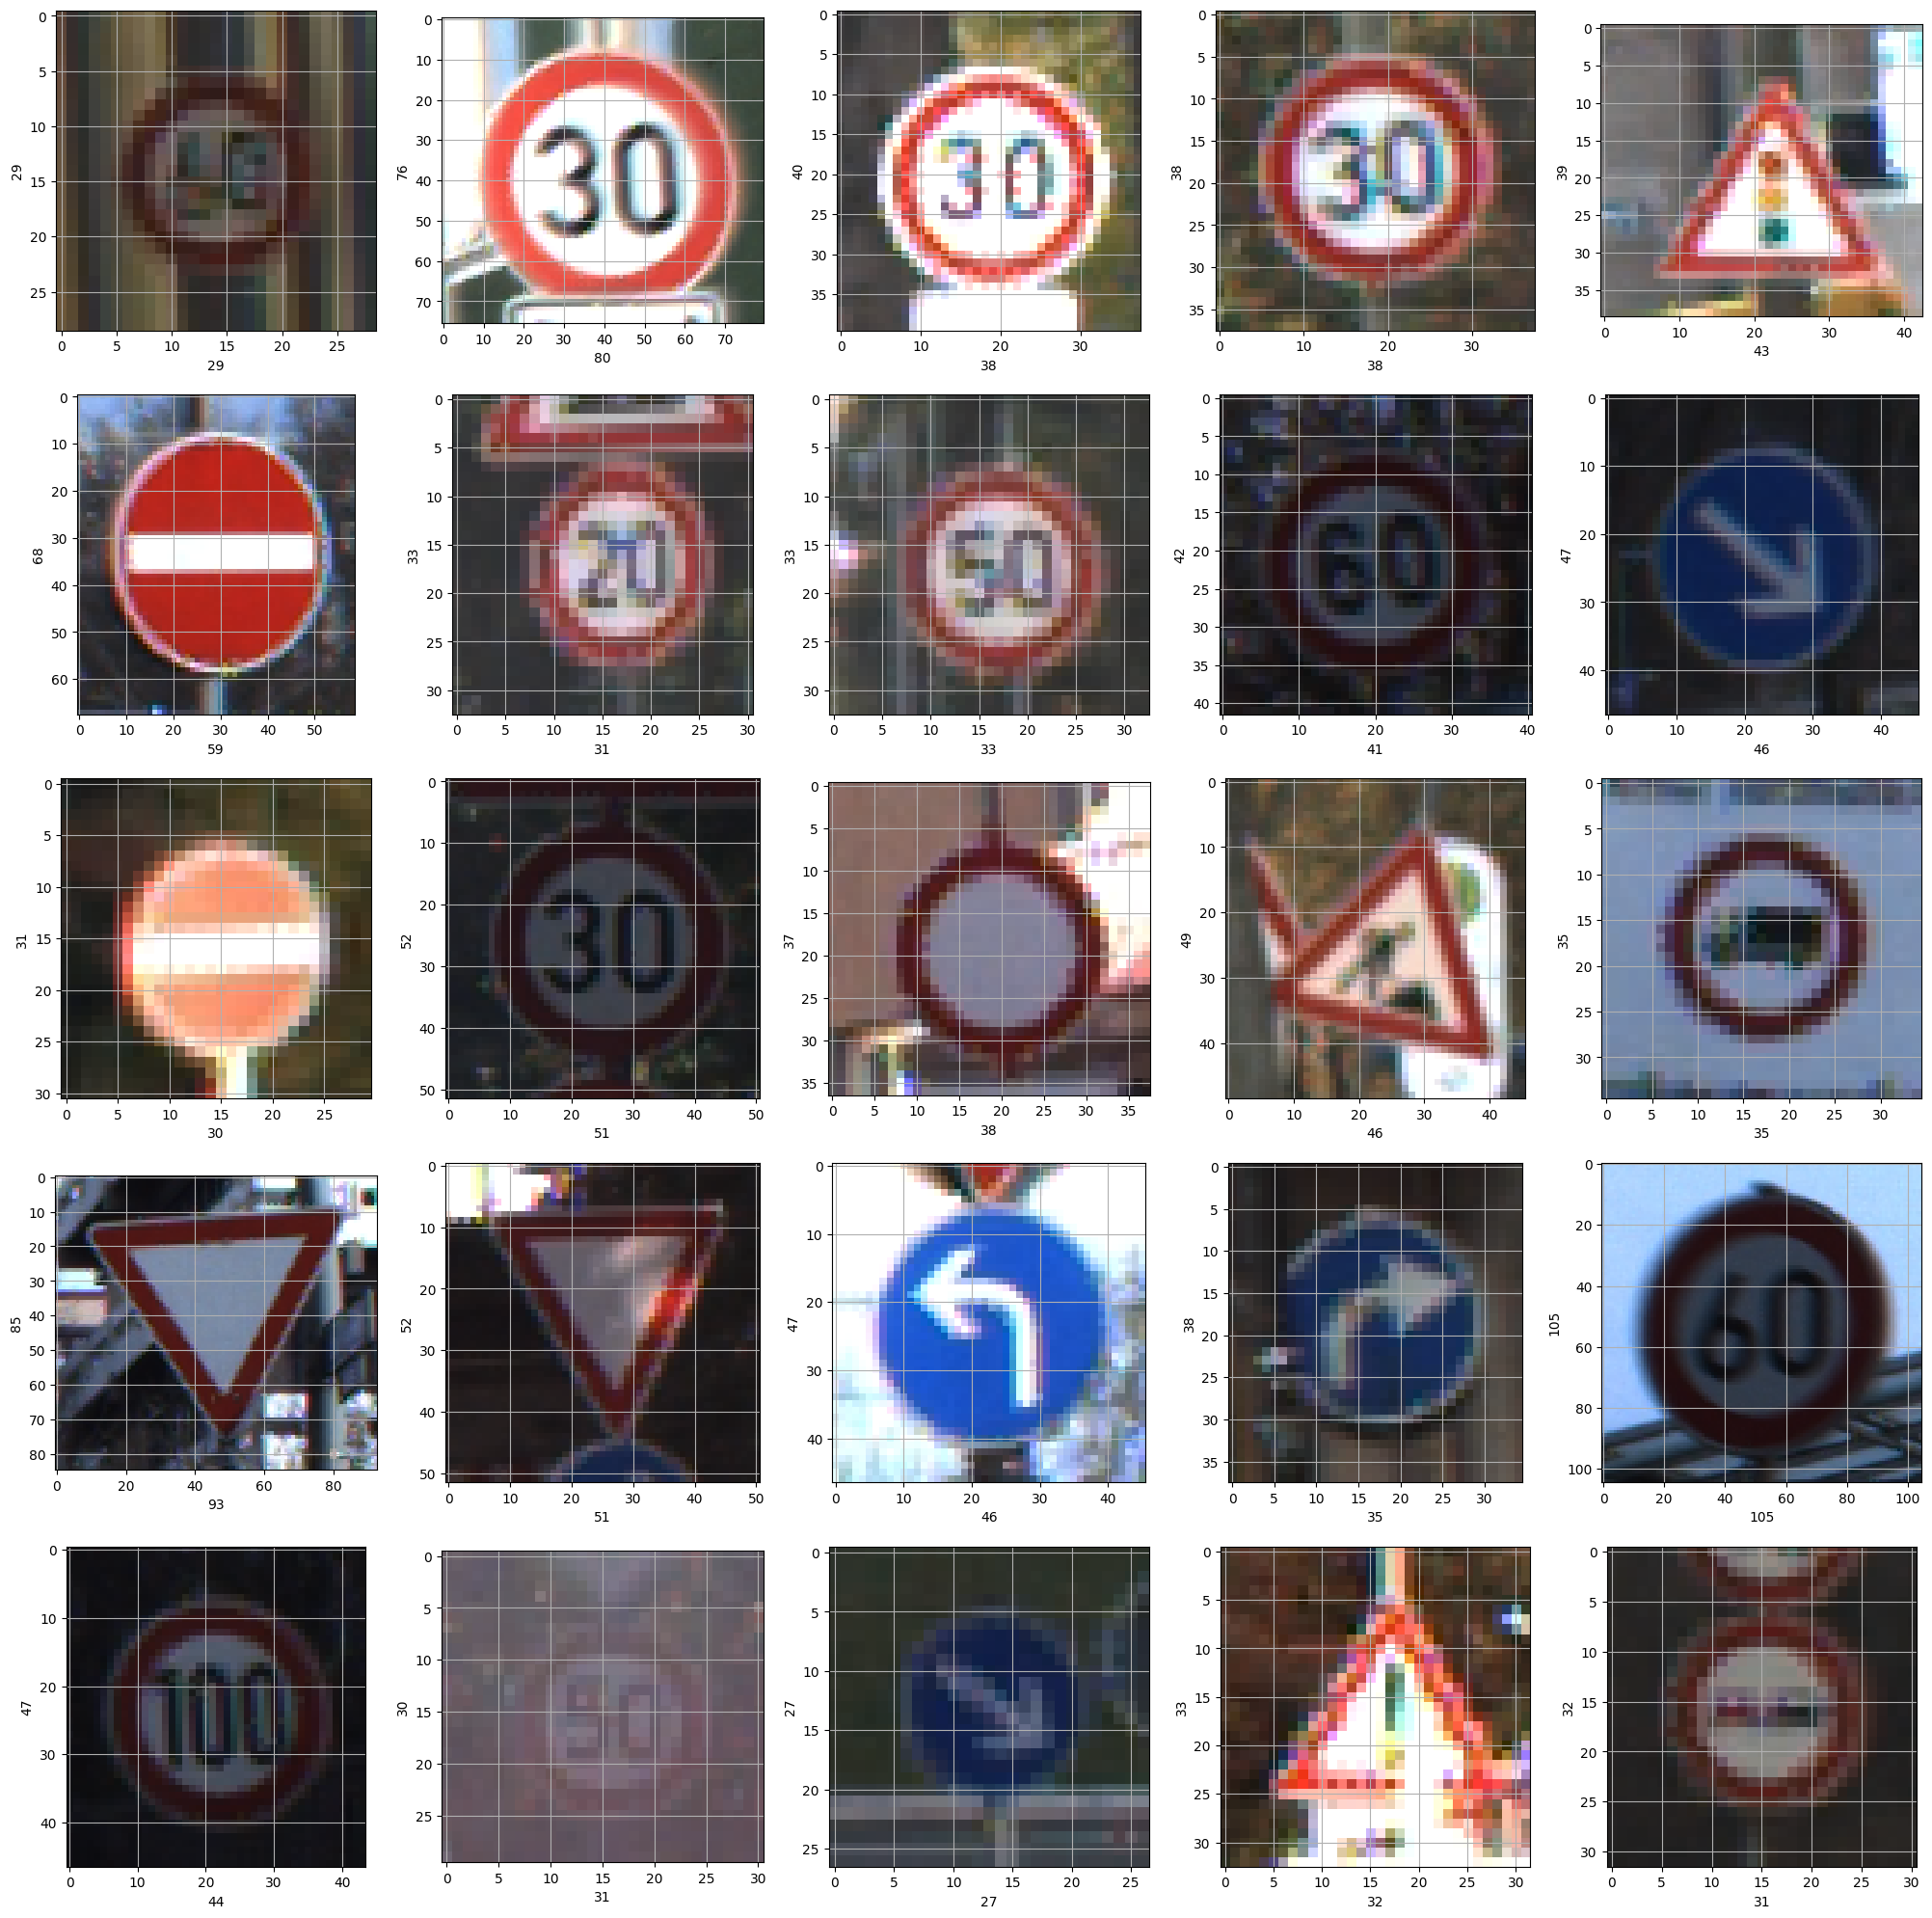

In [66]:
import random
from matplotlib.image import imread

test = pd.read_csv("C:/Users/DELL 5401/Downloads/archive" + '/Test.csv')
imgs = test["Path"].values

plt.figure(figsize=(25,25))

for i in range(1,26):
    plt.subplot(5,5,i)
    random_img_path = "C:/Users/DELL 5401/Downloads/archive" + '/' + random.choice(imgs)
    rand_img = imread(random_img_path)
    plt.imshow(rand_img)
    plt.grid(b=None)
    plt.xlabel(rand_img.shape[1], fontsize = 10)#width of image
    plt.ylabel(rand_img.shape[0], fontsize = 10)

In [53]:
print(data.shape, labels.shape)

# Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Displaying the shape after the split
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# Converting the labels into one hot encoding
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

(39209, 32, 32, 3) (39209,)
(31367, 32, 32, 3) (7842, 32, 32, 3) (31367,) (7842,)


In [67]:
IMG_HEIGHT = 32
IMG_WIDTH = 32
channels = 3

In [68]:
model = keras.models.Sequential([    
    keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu', input_shape=(IMG_HEIGHT,IMG_WIDTH,channels)),
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(axis=-1),
    
    keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(axis=-1),
    
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(rate=0.5),
    
    keras.layers.Dense(43, activation='softmax')
])

In [69]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#M odel display
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 16)        448       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        4640      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 14, 14, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 128)       7

In [70]:
# Training the Model
with tf.device('/GPU:0'):
    epochs = 15
    history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/15
981/981 [==============================] - 80s 80ms/step - loss: 0.3433 - accuracy: 0.9089 - val_loss: 0.0803 - val_accuracy: 0.9748
Epoch 2/15
981/981 [==============================] - 86s 88ms/step - loss: 0.0441 - accuracy: 0.9871 - val_loss: 0.0354 - val_accuracy: 0.9898
Epoch 3/15
981/981 [==============================] - 86s 88ms/step - loss: 0.0324 - accuracy: 0.9905 - val_loss: 0.0413 - val_accuracy: 0.9895
Epoch 4/15
981/981 [==============================] - 79s 80ms/step - loss: 0.0225 - accuracy: 0.9934 - val_loss: 0.0659 - val_accuracy: 0.9830
Epoch 5/15
981/981 [==============================] - 75s 76ms/step - loss: 0.0287 - accuracy: 0.9914 - val_loss: 0.0261 - val_accuracy: 0.9939
Epoch 6/15
981/981 [==============================] - 74s 76ms/step - loss: 0.0160 - accuracy: 0.9949 - val_loss: 0.0406 - val_accuracy: 0.9893
Epoch 7/15
981/981 [==============================] - 70s 72ms/step - loss: 0.0150 - accuracy: 0.9953 - val_loss: 0.0215 - val_accuracy:

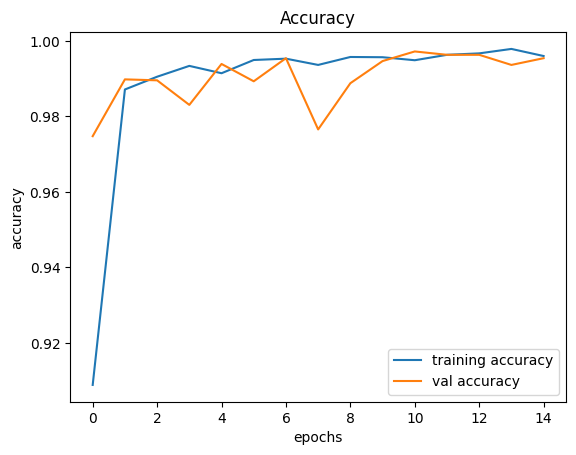

In [72]:
# plotting acuuracy vs epoch
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()



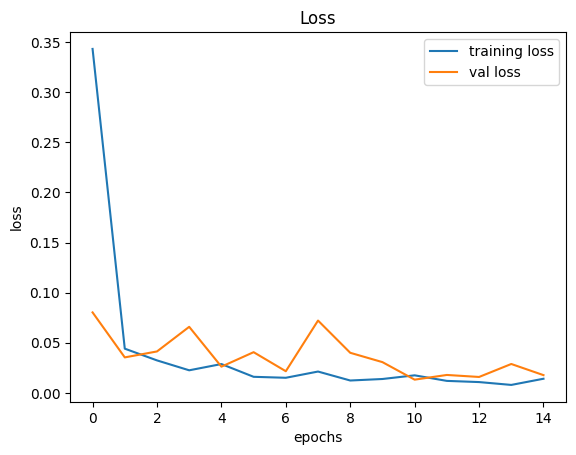

In [73]:
#plotting loss vs epochs
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [83]:
from sklearn.metrics import classification_report, confusion_matrix

In [101]:
test = pd.read_csv("C:/Users/DELL 5401/Downloads/archive" + '/Test.csv')

labels = test["ClassId"].values
imgs = test["Path"].values

data =[]

for img in imgs:
    try:
        image = cv2.imread("C:/Users/DELL 5401/Downloads/archive" + '/' +img)
        image_fromarray = Image.fromarray(image, 'RGB')
        resize_image = image_fromarray.resize((IMG_HEIGHT, IMG_WIDTH))
        data.append(np.array(resize_image))
    except:
        print("Error in " + img)
X_test = np.array(data)
X_test = X_test/255

pred = model.predict(X_test)
#classes=np.argmax(pred,axis=1)

#Accuracy with the test data
print('Test Data accuracy: ',accuracy_score(labels, pred)*100)

395/395 [==============================] - 4s 10ms/step


ValueError: Classification metrics can't handle a mix of multiclass and multilabel-indicator targets